<a href="https://colab.research.google.com/github/khlodMohamed/Computer-Vision/blob/main/ImageMosaics/ImageMosaics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hager Abouroumia   5943**

#**Yehia ElDallal     5607**

#**Khlod Mohamed      5695**

---



# Import Libraries: 

In [ ]:
import cv2
import numpy as np
from scipy import linalg
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math


# *Functions for Get cooresponding points*

### Get Correspondence Points function

In [ ]:
def get_correspondence_points(matches, kp1, kp2):
    # Initialize lists
    list_kp1 = []
    list_kp2 = []

    # For each match...
    for mat in matches:
        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        # Get the coordinates
        (x1, y1) = kp1[img1_idx].pt
        (x2, y2) = kp2[img2_idx].pt

        # Append to each list
        list_kp1.append((x1, y1))
        list_kp2.append((x2, y2))
    return list_kp1, list_kp2


### features_detection function

In [ ]:
def features_detection(img, img2):
  orb = cv2.ORB_create()
  kp1, des1 = orb.detectAndCompute(img, None) # detects keypoints on an image
  kp2, des2 = orb.detectAndCompute(img2, None)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance) # match detected keypoints on both images 
  return matches[:8], kp1, kp2


### Plots Correspondence points on an image

In [ ]:

# plots correspondence points on an image
def plot_points_on_image(image, points):
  font = cv2.FONT_HERSHEY_SIMPLEX
  if type(points[0]) == tuple:
    for i in range(len(points)):
      image = cv2.circle(image, (int(points[i][0]), int(points[i][1])), 2, (0, 0, 255), 3)      
      image = cv2.putText(image, str(i), (int(points[i][0]),int(points[i][1])), font, 0.5, (0, 0, 255), 1)
  else:
      image = cv2.circle(image, (int(points[0]), int(points[1])) , 2, (0, 0, 255), 3)
      image = cv2.putText(image, 'Point', (int(points[0]),int(points[1])), font, 0.5, (0, 0, 255), 1)


  return image



# DLT algorithm:

In [ ]:

# applying DLT algorithm lecture 8, slide 48 to get the H matrix
def DLT(homo_coor, hetero_coor):
    length = len(homo_coor)
    A = np.zeros([2 * length, 9], dtype=float)
    index = 0
    for i in range(length):
        x = homo_coor[i - 1][0]
        y = homo_coor[i - 1][1]
        xx = hetero_coor[i - 1][0]
        yy = hetero_coor[i - 1][1]
        A[index, :] = [-x, -y, -1, 0, 0, 0, x * xx, y * xx, xx]
        A[index + 1, :] = [0, 0, 0, -x, -y, -1, x * yy, y * yy, yy]
        index += 2
    U, s, VT = linalg.svd(A)
    h = VT[-1, :] / VT[-1, -1]
    H = np.reshape(h, (3, 3))
    return H


# Read input images

In [ ]:
img = cv2.imread('/content/sample_data/image1.jpg')
img2 = cv2.imread('/content/sample_data/image2.jpg')
imgkhara = cv2.imread('/content/sample_data/image2.jpg')
image = img.copy()
img3 = img2.copy()
image2=img2.copy()


# plot correspondence points on input images

In [ ]:
matches, kp1, kp2 = features_detection(img, img2) # get matched featuers
img1_coor, img2_coor = get_correspondence_points(matches, kp1, kp2) # gets the correspondence points 

In [ ]:
imggg = plot_points_on_image(img, img1_coor)
img22 = plot_points_on_image(img2, img2_coor)

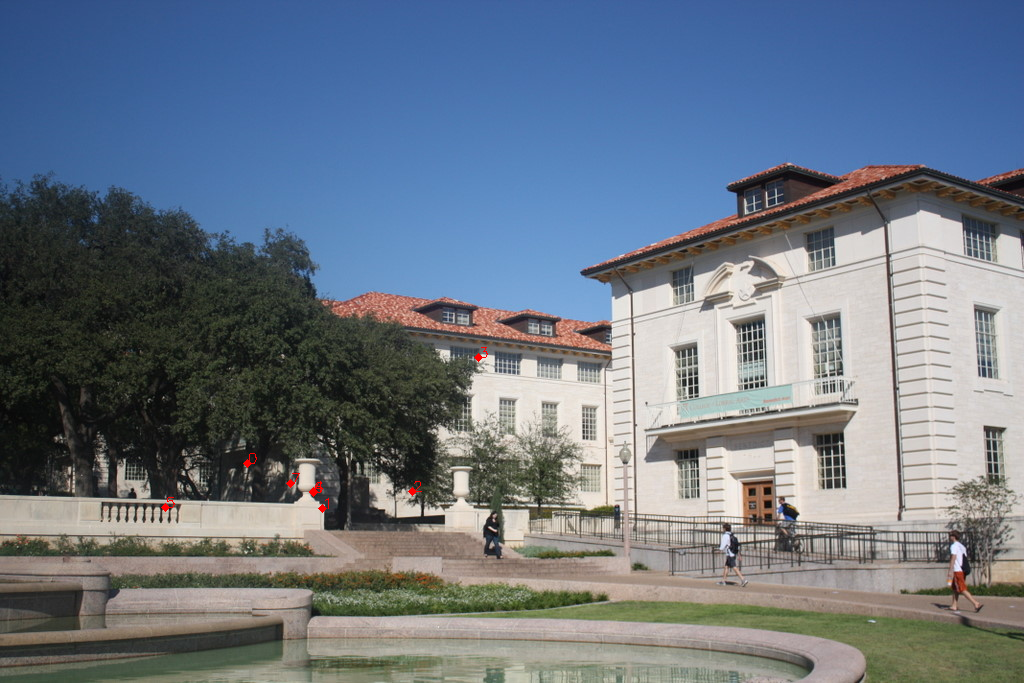

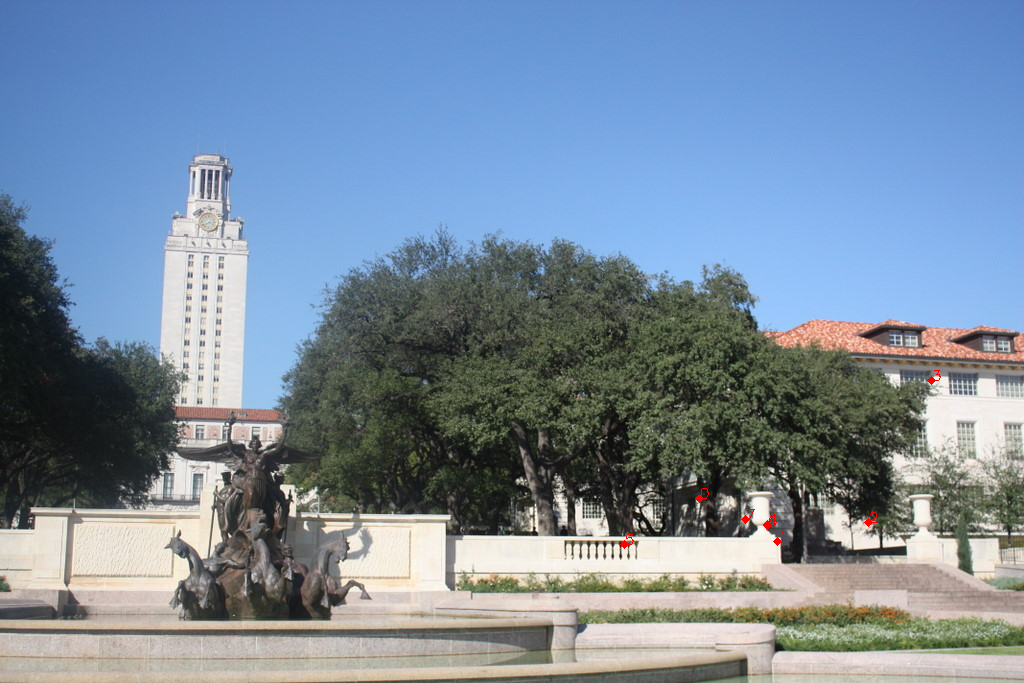

In [ ]:
cv2_imshow(imggg)
cv2_imshow(img22)

# Test DLT function:

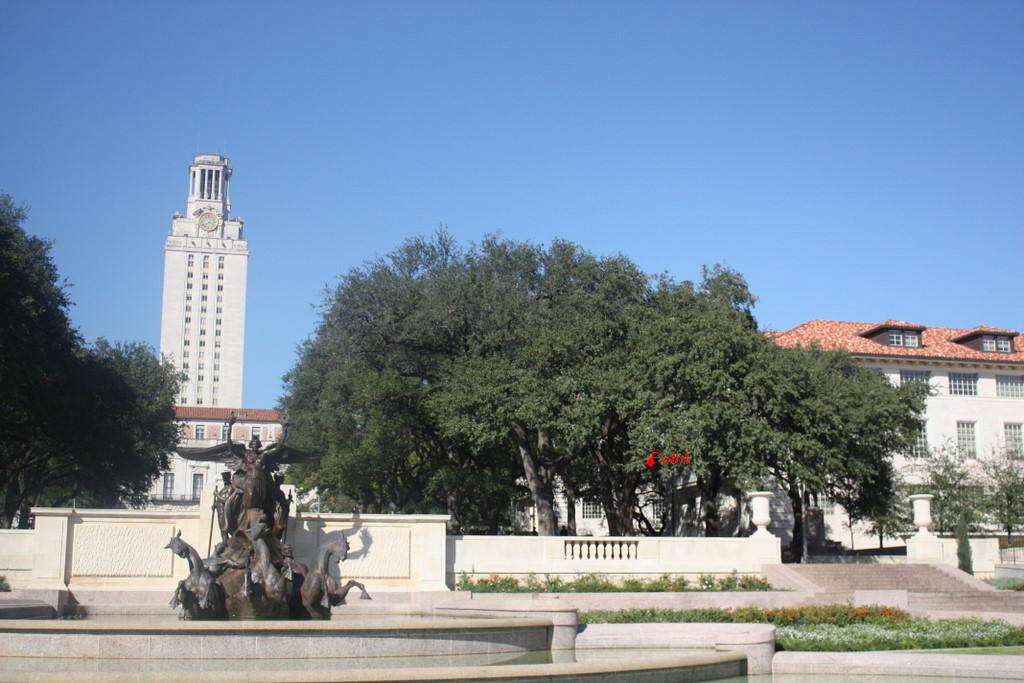


Point 1 on image 1: ( 247.0 , 463.0 )
Point 1 on image 2: ( 650.3777170504989 , 462.95577242884684 )


In [ ]:
H = DLT(img1_coor, img2_coor)
p = [img1_coor[0][0], img1_coor[0][1], 1]
p_ = np.dot(H, p)
img3 = plot_points_on_image(img3, (p_[0], p_[1]))
cv2_imshow(img3)
print("\nPoint 1 on image 1: (",img1_coor[0][0],",",img1_coor[0][1],")")
print("Point 1 on image 2: (",p_[0],",",p_[1],")")

# Important function for Image Mosaics

### Get coordinates of an image

In [ ]:

#creat coordinateslist 
'''
def get_coordinates(image):
description:
     this function used to get coordinates of an img
Arguments: 

 img22: np_array
     stores first two rows of an img
 indices: tuple
      contains the coordinates of an img in two arrays
 coordinates: zip
      convert indices to pairs of stored points
 coordinateslist: list
      to deal with the coordinates
'''
def get_coordinates(image):
  img22 = image[:,:,0]  

  indices = np.where(img22!= [0])

  coordinates = zip(indices[0], indices[1])
  coordinateslist=list(coordinates)
  return coordinateslist


### Get the Transformed coordinates for an image
given H matrix

In [ ]:
'''
def transformed_coordinates(coordinateslist,H):
discription:
      this fun used to transform coordinateslist by H matrix
            for loop:     np.dot:
                  to get the new coordenates when warping image1

Arduments: 
      coordinateslist: list
                  to store coordinates of image1
      newcoordinates:  list
                  to store warping coordinates of image1

'''
def transformed_coordinates(coordinateslist,H):
  newcoordinates=[] 
  for i in range(len(coordinateslist)):
         p = [coordinateslist[i-1][0],coordinateslist[i-1][1], 1]
         p_ = np.dot(H, p)

         newcoordinates.append((round(p_[0]/p_[2]),round(p_[1]/p_[2])))
  return newcoordinates

### Get transformed corners of an image

In [ ]:

'''
discription:
        this fun used to get the coordinateslist of the corners of an img
Arguments:
         BoxCoordinates[]:list 
                  store the corners of the new img
         row: int
                  store the num of rows of image1
         col: int
                  store the num of cols of img1 
 p_ = np.dot(H, p)
 p_: point of one of the corners of the new img
 P: point of one corners of img1
 H: homography matrix '''

def Get_corners(row,col):
     BoxCoordinates=[]
     p = [0,0, 1]
     p_ = np.dot(H, p)
     BoxCoordinates.append((round(p_[0]/p_[2]),round(p_[1]/p_[2])))# upper left
     p = [0,col, 1]
     p_ = np.dot(H, p)
     BoxCoordinates.append((round(p_[0]/p_[2]),round(p_[1]/p_[2])))# upper right 

     p = [row,0, 1]
     p_ = np.dot(H, p)
     BoxCoordinates.append((round(p_[0]/p_[2]),round(p_[1]/p_[2])))# left bottom

     p = [row,col, 1]
     p_ = np.dot(H, p)
     BoxCoordinates.append((round(p_[0]/p_[2]),round(p_[1]/p_[2])))# right bottom
     return np.array(BoxCoordinates)

### Get a new size of a transformed image
using transformed corners

In [ ]:
'''
description: 
   function takes old img and returne the size of new img 
   according to new position of new corners 
Arguments:
 row:int 
  num of rows of old img
 col: int
  num of cols of new img
 BoxCoordinates_array:np_array
  new corners coordinates
 new_row:int
  rows of new img
 new_cols:
  cols of new img
 new_img:np_array
  zeros array with shape of new img
'''
def get_newimg_size(img):
  row=img.shape[0]-1
  col=img.shape[1]-1
  BoxCoordinates_array= Get_corners(row,col)# convert corners list to a np_array
  col_=[]
  test=np.array([1,10,-3,4,-5])
  row_=np.where(BoxCoordinates_array[:,0]<0)     #get -ve rows
  col_=np.where(BoxCoordinates_array[:,1]<0)     #get -ve cols
  c=min(BoxCoordinates_array[:,1])
  r=min(BoxCoordinates_array[:,0])
  if(c>0):
    c=0
  if(r>0):
    r=0
  new_row=max(BoxCoordinates_array[:,0]+abs(r))        # get num of rows of the new img
  new_col=max(BoxCoordinates_array[:,1]+abs(c))        #get num of cols of the new img
  #new_img=np.zeros([new_row+1,new_col+1+abs(c),3])     # creat new_img array
  new_img=np.zeros([new_row+1+abs(r),new_col+1+abs(c),3])     # creat new_img array
  return new_img,abs(r),abs(c)

### Forward Warping

In [ ]:
# (forward warping)
'''
forward_warping(new_img,image,coordinatesarr,newcoordinates_array,r,c)
description:
     this fun used to move the intensity from the old img to new one by forward warping
Arguments:
 new_img: np_array
        the img that will be modified (will filled with intensity)
 image: np_array
        old img that willbe used to copy the intensity from
 coordinatesarr: np_array
        coordinates of old img
 newcoordinates_array:np_array
        coordinates of new img 
 r: int
        referes to the -ve part in rows (0 in this case)   
 c: int
        referes to the -ve part in columns(68 in this case)
 
'''
def forward_warping(new_img,image,coordinatesarr,newcoordinates_array,r,c):
   for i in range(len(list(coordinatesarr))-1): 
       element=new_img[newcoordinates_array[i-1][0]+r,newcoordinates_array[i-1][1]+c,:]
       if((element[0]==0)and(element[1]==0)and(element[2]==0)):
           new_img[newcoordinates_array[i-1][0]+r,newcoordinates_array[i-1][1]+c,:]=image[coordinatesarr[i-1][0],coordinatesarr[i-1][1],:]
       else:
           old=new_img[newcoordinates_array[i-1][0]+r,newcoordinates_array[i-1][1]+c,:]
           new_img[newcoordinates_array[i-1][0]+r,newcoordinates_array[i-1][1]+c,:]=(old+image[coordinatesarr[i-1][0],coordinatesarr[i-1][1],:])/2 

   return new_img



Bilinear Interpolation

In [ ]:
'''

This function estimates a pixel's value depending on its four neighboring pixels.
The neighboring pixels are(floor,floor)(floor,ceil)(ceil,floor)(ceil,ceil).
Each neighboring pixel has its own weight depending on the distance between it and the required pixel.
Closer this distance is, The higher weight it gets.
Each neighboring pixel will contribute to the final result---> depending on its weight.

'''

def bilinear_interpolation(x,y,img):
  upperx = math.ceil(x)
  lowerx = math.floor(x)
  uppery = math.ceil(y)
  lowery = math.floor(y)
  fractx = upperx - x
  fracty = uppery - y
  upperxweight = 1-fractx
  lowerxweight = fractx
  upperyweight = 1-fracty
  loweryweight = fracty
  ll = lowerxweight * loweryweight
  lu = lowerxweight * upperyweight
  ul = upperxweight * loweryweight
  uu = upperxweight * upperyweight
  pixelvalue = ll*img[lowerx,lowery]+lu*img[lowerx,uppery]+ul*img[upperx,lowery]+uu*img[upperx,uppery]
  return pixelvalue

### Inverse Warping

In [ ]:
'''
This function warps an image to the plane of an another image.
Warping is done by looping on each pixel in the output image (inverse warping).
This guarentees that each pixel in the output picture has its own itensity value.
Each intensity value is determined using bilinear interpolation.

'''

def inverse_warpingyy(new_img_final,new_img_Diagonal):
  Hinv = np.linalg.inv(H)
  for i in range(new_img_final.shape[0]-1):
    for j in range(new_img_final.shape[1]-1):
      p = [i,j,1]
      pTransformed = np.dot(Hinv,p)
      pTransformed[0] = pTransformed[0]/pTransformed[2]
      pTransformed[1] = pTransformed[1]/pTransformed[2]
      if(pTransformed[0] > new_img_Diagonal.shape[0]-1 or pTransformed[1] > new_img_Diagonal.shape[1]-1 or pTransformed[0] < 0 or pTransformed[1] < 0):
        continue 
      new_img_final[i,j] = bilinear_interpolation(pTransformed[0],pTransformed[1],new_img_Diagonal)
  return new_img_final

#forward warping on image1 according to image2



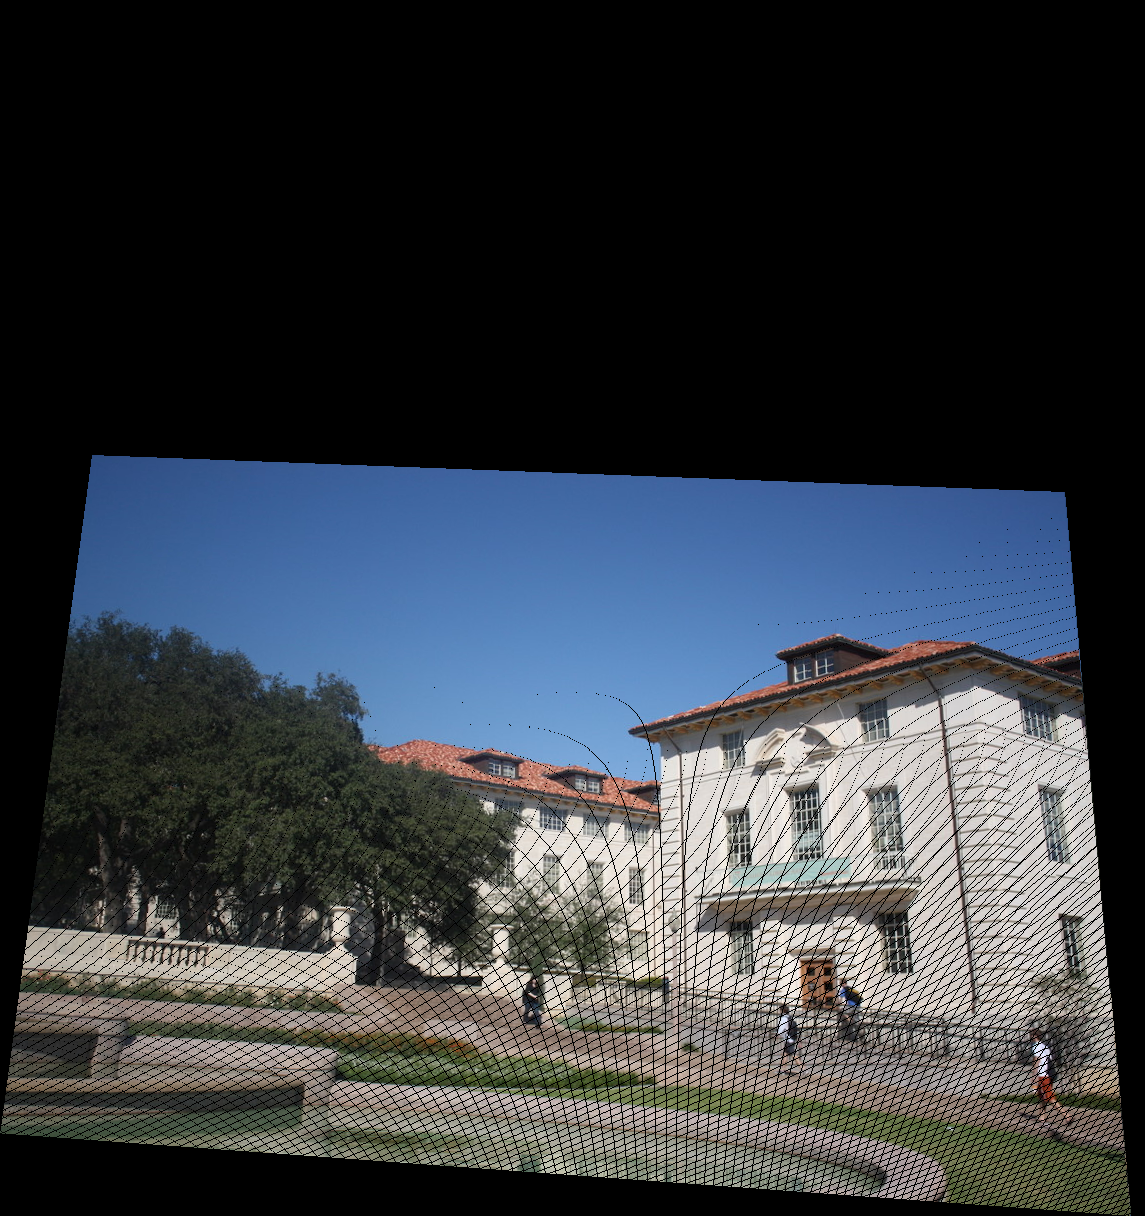

In [ ]:
H = DLT(img1_coor, img2_coor)       #get h homograph src: image1 dest: image2
coordinateslist=get_coordinates(image)       #get goordinates of image1
coordinatesarr=np.array(coordinateslist)
newcoordinates_array=np.array(transformed_coordinates(coordinateslist,H))  # get transformed coordinates
new_img_Diagonal,r,c=get_newimg_size(image)  #calculate new size for transformed image1
new_img_Diagonal=forward_warping(new_img_Diagonal,image,coordinatesarr,newcoordinates_array,r,c) #forward warping on image1
cv2_imshow(new_img_Diagonal)


#inverse warping on image1 according to image2


In [ ]:
new_img_final=np.zeros([2000,2000,3])  
new_img_final=inverse_warpingyy(new_img_final,image) #use inverse warping 


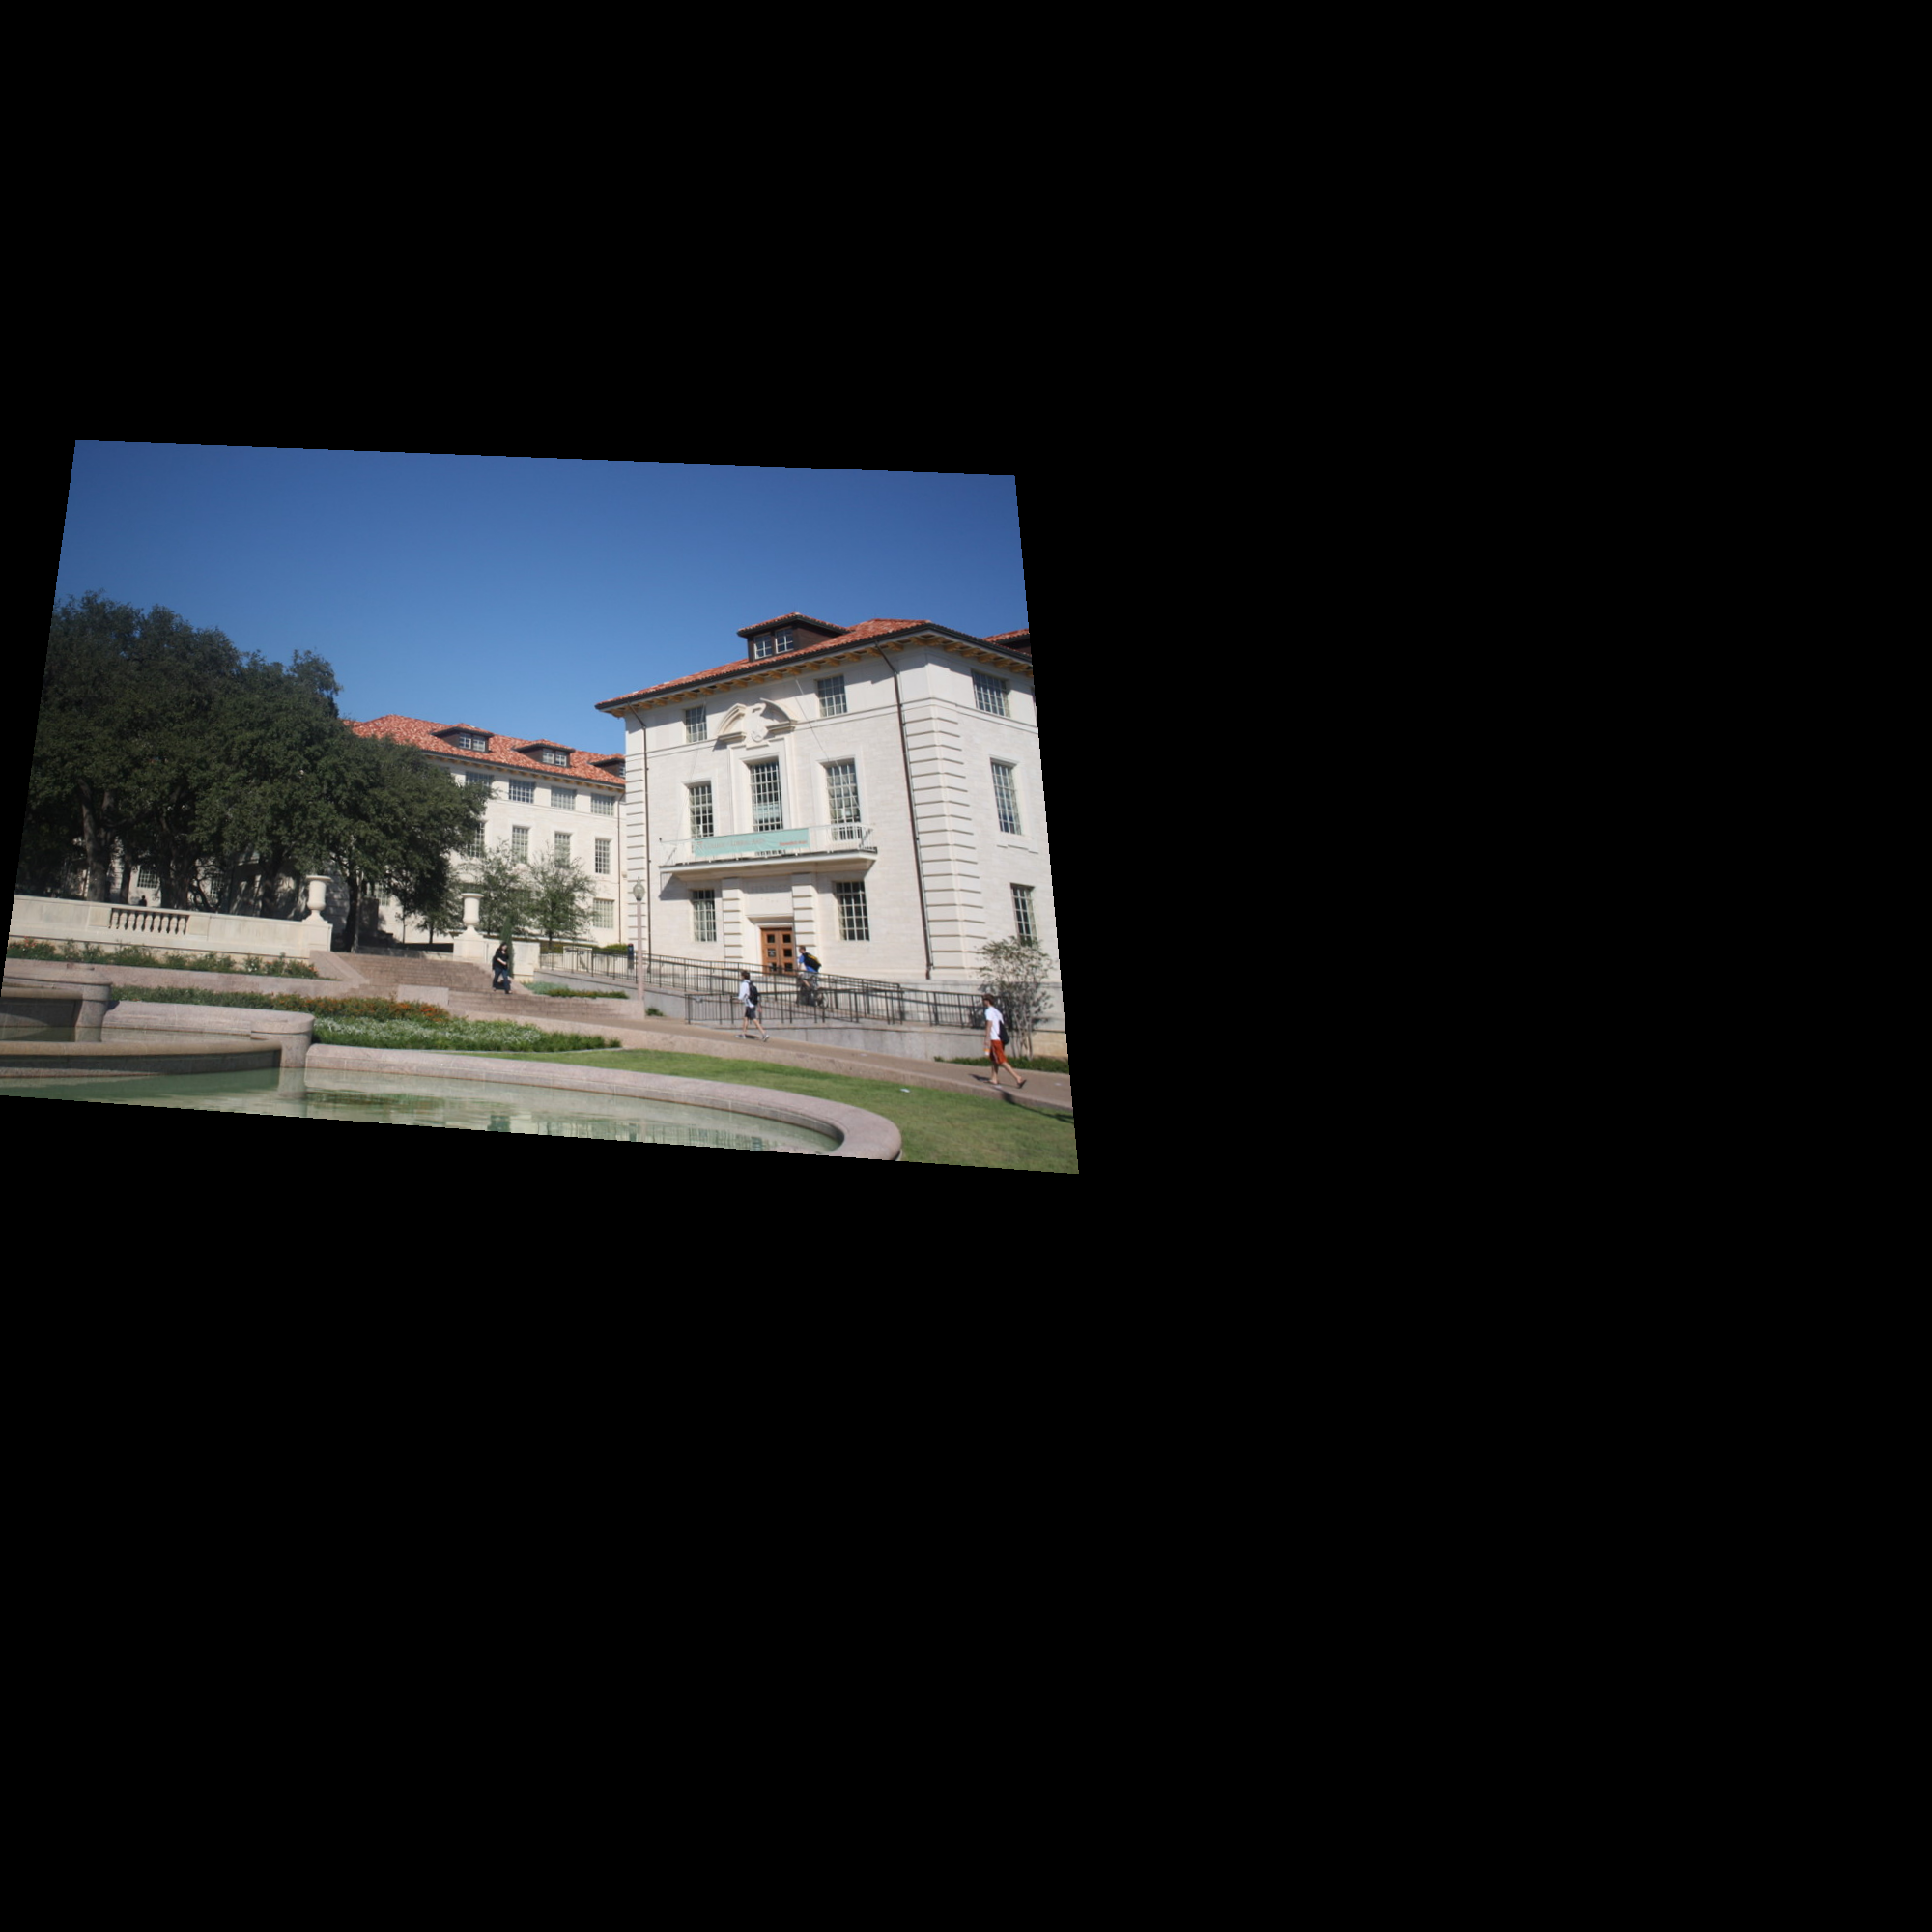

In [ ]:
cv2_imshow(new_img_final)


# stitching the two images

In [ ]:
img2=image2.copy()
print(new_img_final.shape)
print(img2.shape)
a_del=new_img_final.copy()
up=875
right=600
print(a_del.shape)

output=np.zeros([a_del.shape[0],2*a_del.shape[1],3])

output[0:,img2.shape[1]-right:-(right+121+855)]=a_del

output[-img2.shape[0]-up:-up,0:img2.shape[1]]=img2


(2000, 2000, 3)
(683, 1024, 3)
(2000, 2000, 3)


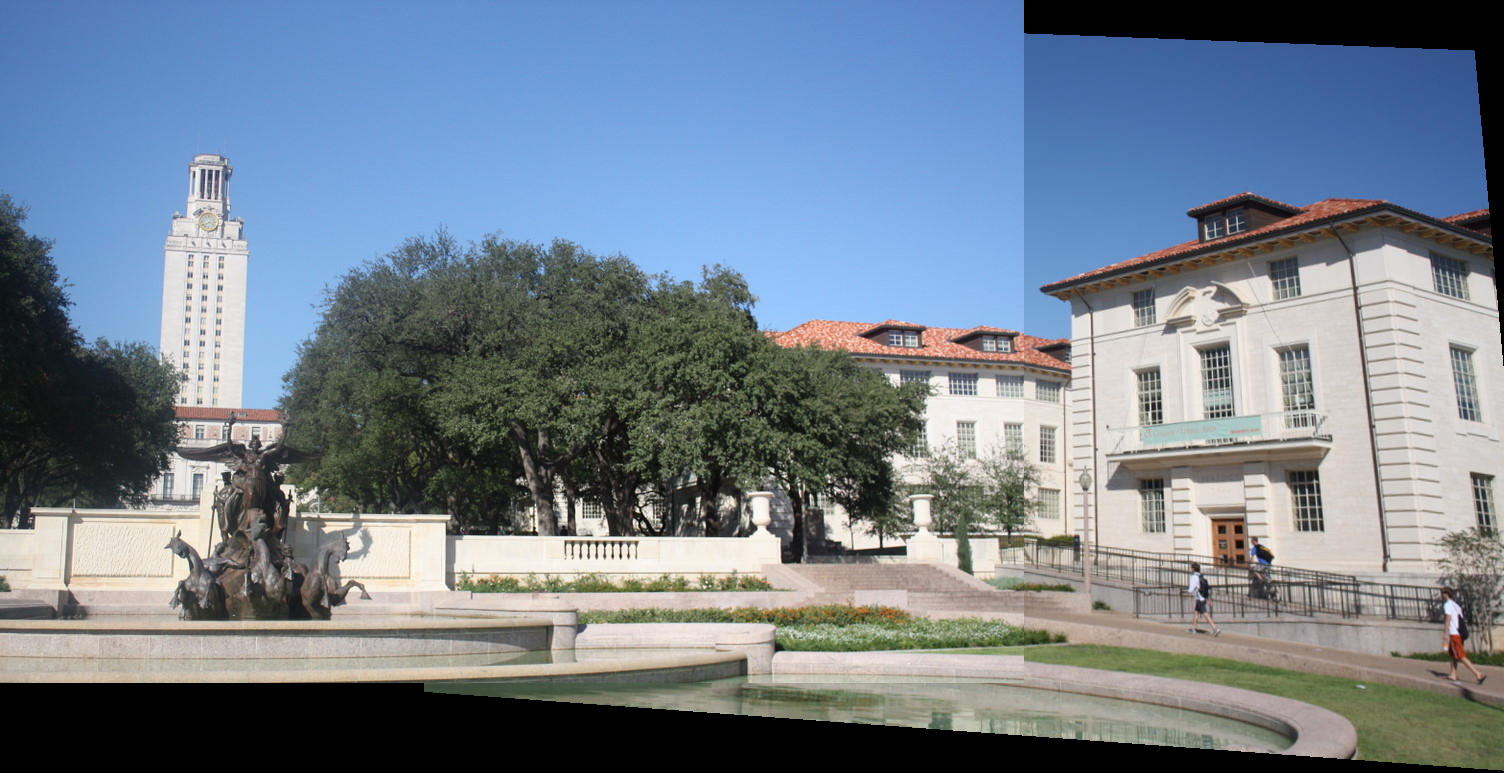

In [ ]:
rows=-img2.shape[0]-up
cols=img2.shape[1]+right-120

out=output[rows:img2.shape[0]+rows+90,0:cols]
cv2_imshow(out)
